In [12]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
data = load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
N, D = X_train.shape

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 41ms/step - loss: 0.6813 - accuracy: 0.6281 - val_loss: 0.5777 - val_accuracy: 0.7076
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6159 - accuracy: 0.7111 - val_loss: 0.5225 - val_accuracy: 0.8012
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.5582 - accuracy: 0.7663 - val_loss: 0.4767 - val_accuracy: 0.8304
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.5119 - accuracy: 0.7990 - val_loss: 0.4371 - val_accuracy: 0.8538
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.4710 - accuracy: 0.8291 - val_loss: 0.4044 - val_accuracy: 0.8655
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.4385 - accuracy: 0.8518 - val_loss: 0.3761 - val_accuracy: 0.8947
Epoch 7/100
13/13 [==============================] - 0s 18ms/step - loss: 0.4091 - accuracy: 0.8693 - val_loss: 0.3520 - val_accuracy: 0.9240
Epoch 8/

In [8]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9874
Train score: [0.0940391793847084, 0.9874371886253357]
6/6 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.9766
Test score: [0.08295337855815887, 0.9766082167625427]


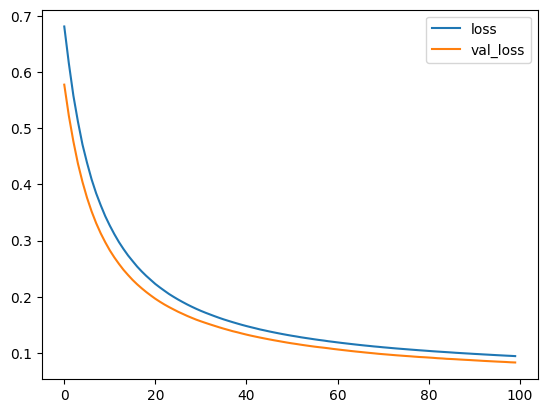

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

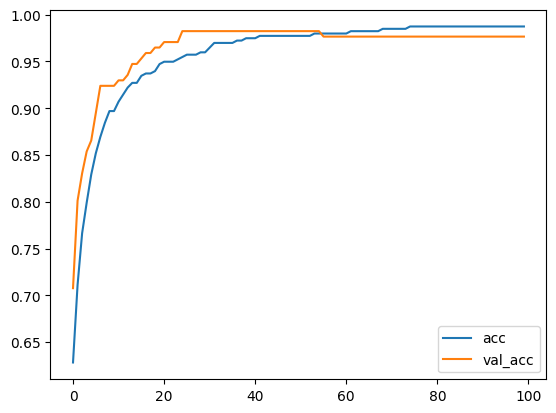

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
import numpy as np

P = model.predict(X_test)
print(P)
P = np.round(P).flatten()
print(P)

6/6 [==============================] - 0s 2ms/step
[[3.23653996e-01]
 [2.19073892e-01]
 [9.99177873e-01]
 [9.83954668e-01]
 [5.88133465e-04]
 [9.56393480e-01]
 [9.07525301e-01]
 [9.84150529e-01]
 [9.94956076e-01]
 [1.39404583e-04]
 [9.90490854e-01]
 [5.60044427e-04]
 [9.98689890e-01]
 [3.18704336e-03]
 [1.81336563e-05]
 [9.92853701e-01]
 [8.72212529e-01]
 [9.97981369e-01]
 [1.57618138e-03]
 [9.91132259e-01]
 [9.72576261e-01]
 [9.95645165e-01]
 [9.56154346e-01]
 [8.58984888e-01]
 [3.03788576e-03]
 [9.99315798e-01]
 [9.38082635e-01]
 [9.82083559e-01]
 [7.43313169e-04]
 [7.55827898e-07]
 [2.30851639e-02]
 [9.34229016e-01]
 [9.99981225e-01]
 [8.21480632e-01]
 [5.87589592e-02]
 [6.99502230e-03]
 [8.37390363e-01]
 [5.98124444e-01]
 [9.99307692e-01]
 [9.95139599e-01]
 [3.17782542e-04]
 [3.80409659e-07]
 [9.95682359e-01]
 [2.62283146e-01]
 [9.97548103e-01]
 [3.83602595e-03]
 [9.96463060e-01]
 [9.91624653e-01]
 [9.35225725e-01]
 [3.16795224e-04]
 [9.36552882e-01]
 [9.95000720e-01]
 [9.83129442e

In [16]:
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9766081871345029
6/6 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 0.9766
Evaluate output: [0.08295337855815887, 0.9766082167625427]


In [17]:
model.save('MLBasicslinearclassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K Mar  9 20:27 MLBasicslinearclassifier.h5
drwxr-xr-x 1 root root 4.0K Mar  7 14:32 sample_data


In [19]:
model = tf.keras.models.load_model('MLBasicslinearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.9766


[0.08295337855815887, 0.9766082167625427]

In [27]:
%reset -f
#!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

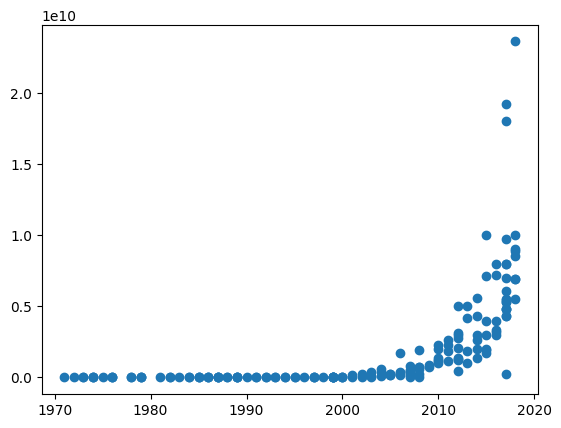

In [32]:
plt.scatter(X, y)

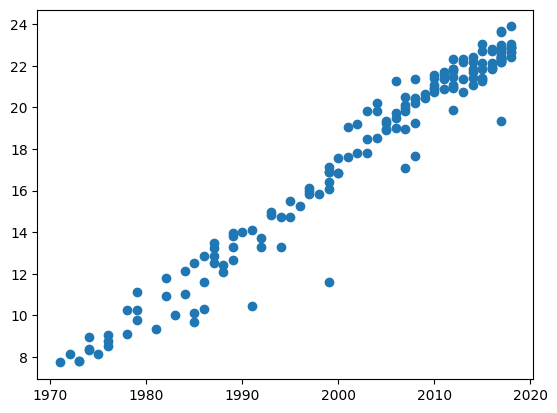

In [34]:
y = np.log(y)
plt.scatter(X, y)

In [35]:
X = X - X.mean()

In [37]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(1,)), tf.keras.layers.Dense(1)])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 324.5402 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 294.9336 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 311.4626 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 285.9180 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 216.0997 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 164.3543 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 110.9041 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 65.2797 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 46.0269 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 40.3512 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 

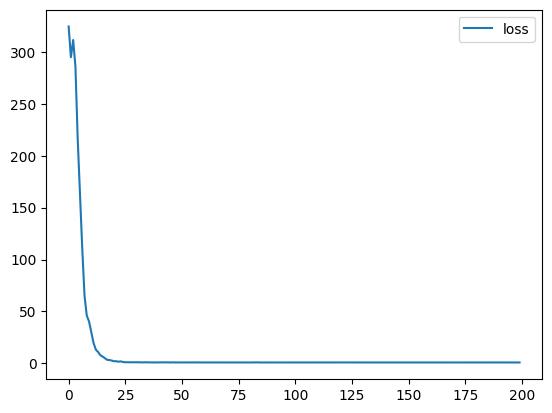

In [39]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [40]:
print(model.layers[0].get_weights())

[array([[0.34159318]], dtype=float32), array([17.766745], dtype=float32)]


In [41]:
a = model.layers[0].get_weights()[0][0,0]

In [42]:
print("Time to double:", np.log(2) / a)

Time to double: 2.029159915955982


In [44]:
X = np.array(X).flatten()
Y = np.array(y)
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean()*X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


6/6 [==============================] - 0s 2ms/step


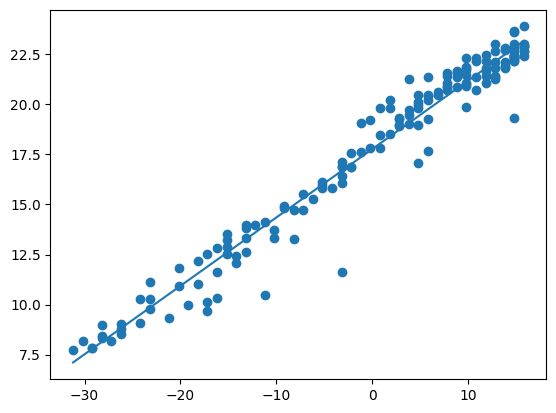

In [45]:
yhat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, yhat)

In [46]:
w, b = model.layers[0].get_weights()
X = X.reshape(-1, 1)

yhat2 = (X.dot(w) + b).flatten()

np.allclose(yhat, yhat2)

True